In [ ]:
pip install pybbn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

In [ ]:
pB = .001 
pB_prime = 1-pB

pE = 0.002 
pE_prime = 1-pE 

pA_for_Bt_Et = .95 
pA_for_Bt_Et_prime = 1-pA_for_Bt_Et 

pA_for_Bt_Ef = .94 
pA_for_Bt_Ef_prime = 1-pA_for_Bt_Ef

pA_for_Bf_Et = .29
pA_for_Bf_Et_prime = 1-pA_for_Bf_Et 

pA_for_Bf_Ef = .001 
pA_for_Bf_Ef_prime = 1-pA_for_Bf_Ef 

pJ_for_At = .90 
pJ_for_At_prime = 1-pJ_for_At 

pJ_for_Af = 0.05 
pJ_for_Af_prime = 1-pJ_for_Af 

pM_for_At = .70 
pM_for_At_prime = 1-pM_for_At 

pM_for_Af = 0.01 
pM_for_Af_prime = 1-pM_for_Af  

In [ ]:
Burglary = BbnNode(Variable(0, 'Burglary', ['True', 'False']), [pB, pB_prime])
Earthquake = BbnNode(Variable(1, 'Earthqauake', ['True', 'False']), [pE, pE_prime])
Alarm = BbnNode(Variable(2, 'Alarm', ['True', 'False']), [pA_for_Bt_Et, pA_for_Bt_Et_prime, pA_for_Bt_Ef, pA_for_Bt_Ef_prime, pA_for_Bf_Et, pA_for_Bf_Et_prime, pA_for_Bf_Ef, pA_for_Bf_Ef_prime])
Johncalls = BbnNode(Variable(3, 'Johncalls', ['True', 'False']), [pJ_for_At, pJ_for_At_prime, pJ_for_Af, pJ_for_Af_prime])
Marycalls = BbnNode(Variable(4, 'Marycalls', ['True', 'False']), [pM_for_At, pM_for_At_prime, pM_for_Af, pM_for_Af_prime])

In [ ]:
bbn = Bbn() \
    .add_node(Burglary) \
    .add_node(Earthquake) \
    .add_node(Alarm) \
    .add_node(Johncalls) \
    .add_node(Marycalls) \
    .add_edge(Edge(Burglary, Alarm, EdgeType.DIRECTED)) \
    .add_edge(Edge(Earthquake, Alarm, EdgeType.DIRECTED)) \
    .add_edge(Edge(Alarm, Johncalls, EdgeType.DIRECTED)) \
    .add_edge(Edge(Alarm, Marycalls, EdgeType.DIRECTED))

In [ ]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


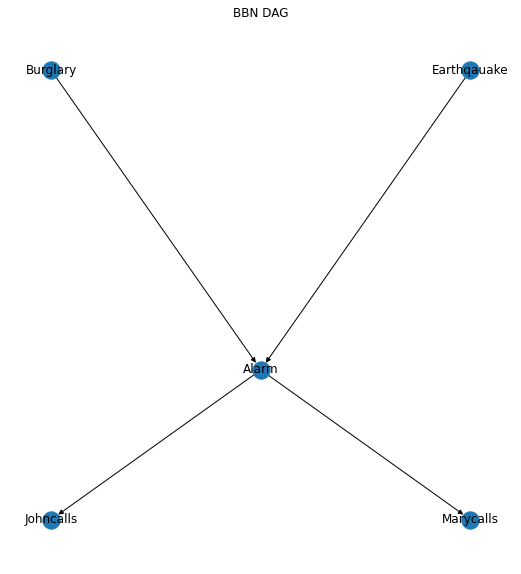

In [ ]:
%matplotlib inline
from pybbn.generator.bbngenerator import convert_for_drawing
import matplotlib.pyplot as plt
import networkx as nx
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    graph = convert_for_drawing(bbn)
    pos = {0: (-1, 2), 1: (1, 2), 2: (0, 1), 3: (-1, 0.5), 4: (1, 0.5)}  
    plt.figure(figsize=(20, 10))
    plt.subplot(121) 
    labels = dict([(k, node.variable.name) for k, node in bbn.nodes.items()])
    nx.draw(graph, pos=pos, with_labels=True, labels=labels)
    plt.title('BBN DAG')

In [ ]:
join_tree = InferenceController.apply(bbn)
for node in join_tree.get_bbn_nodes():
    potential = join_tree.get_bbn_potential(node)
    print(node)
    print(potential)
    print('--------------------->')

2|Alarm|True,False
2=True|0.00252
2=False|0.99748
--------------------->
3|Johncalls|True,False
3=True|0.05214
3=False|0.94786
--------------------->
4|Marycalls|True,False
4=True|0.01174
4=False|0.98826
--------------------->
1|Earthqauake|True,False
1=True|0.00200
1=False|0.99800
--------------------->
0|Burglary|True,False
0=True|0.00100
0=False|0.99900
--------------------->
